# Machine Learning

In this part we will assess ML model

# Final modeling with Extracted Features from EDA

- Linear Regression
- Random Forest

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")
data=pd.read_csv('../dataset/extracted/feature_extracted.csv')
# data=pd.read_csv('../dataset/processed/cleanedData.csv')
data.head(2)

,Movie_Title,Movie_ID,Budget,Cast,Crew,Studios,Genre,Keywords,Languages,Countries,...,crewsTeamRank,NumTopCrew,HasTopCrew,NumStudios,StudioRank,NumTopStudios,HasTopStudio,CountryRank,keywordRank,cerRank
0,Star Wars: Episode VII - The Force Awakens,2488496,245000000,"['Daisy Ridley', 'John Boyega', 'Oscar Isaac',...","['Lawrence Kasdan', 'Michael Arndt', 'J.J. Abr...","['Lucasfilm', 'Bad Robot', 'Truenorth Producti...","['Action', 'Adventure', 'Sci-Fi']","['reboot', 'sanitation employee', 'remake', 'c...",['English'],['United States'],...,3087,3,1,3,1237,2,1,6,287,5
1,Frozen II,4520988,150000000,"['Kristen Bell', 'Idina Menzel', 'Josh Gad', '...","['Jennifer Lee', 'Hans Christian Andersen', 'C...","['Walt Disney Animation Studios', 'Walt Disney...","['Animation', 'Adventure', 'Comedy', 'Family',...","['autumn', 'anthropomorphic snowman', 'princes...",['English'],['United States'],...,1145,1,1,2,1128,2,1,6,304,4


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8752 entries, 0 to 8751
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Movie_Title        8752 non-null   object 
 1   Movie_ID           8752 non-null   int64  
 2   Budget             8752 non-null   int64  
 3   Cast               8752 non-null   object 
 4   Crew               8752 non-null   object 
 5   Studios            8752 non-null   object 
 6   Genre              8752 non-null   object 
 7   Keywords           8752 non-null   object 
 8   Languages          8752 non-null   object 
 9   Countries          8752 non-null   object 
 10  Release_Data       8752 non-null   object 
 11  Runtime            8752 non-null   int64  
 12  Gross_worldwide    8752 non-null   int64  
 13  Rating             8752 non-null   float64
 14  Rating_Count       8752 non-null   int64  
 15  ListOfCertificate  8752 non-null   object 
 16  Release_Year       8752 

Drop **str** column

In [46]:
for index in data.columns:
    if type(data[index][0])== str:
        data=data.drop(index,axis=1)
# Drop Movie_ID, Rating, Rating_Count
data.drop(['Movie_ID','Rating','Rating_Count','Release_Day','Release_Month'],axis=1,inplace=True)
data.head(2)

,Budget,Runtime,Gross_worldwide,Release_Year,GenreRank,SpecialMonth,CastsRank,NumLeadActors,HasTop50Actors,NumCrews,crewsTeamRank,NumTopCrew,HasTopCrew,NumStudios,StudioRank,NumTopStudios,HasTopStudio,CountryRank,keywordRank,cerRank
0,245000000,138,2069521700,2015,20.666667,1,58080,8,1,3,3087,3,1,3,1237,2,1,6,287,5
1,150000000,103,1450026933,2019,18.333333,1,41465,2,0,3,1145,1,1,2,1128,2,1,6,304,4


Correlation Plot

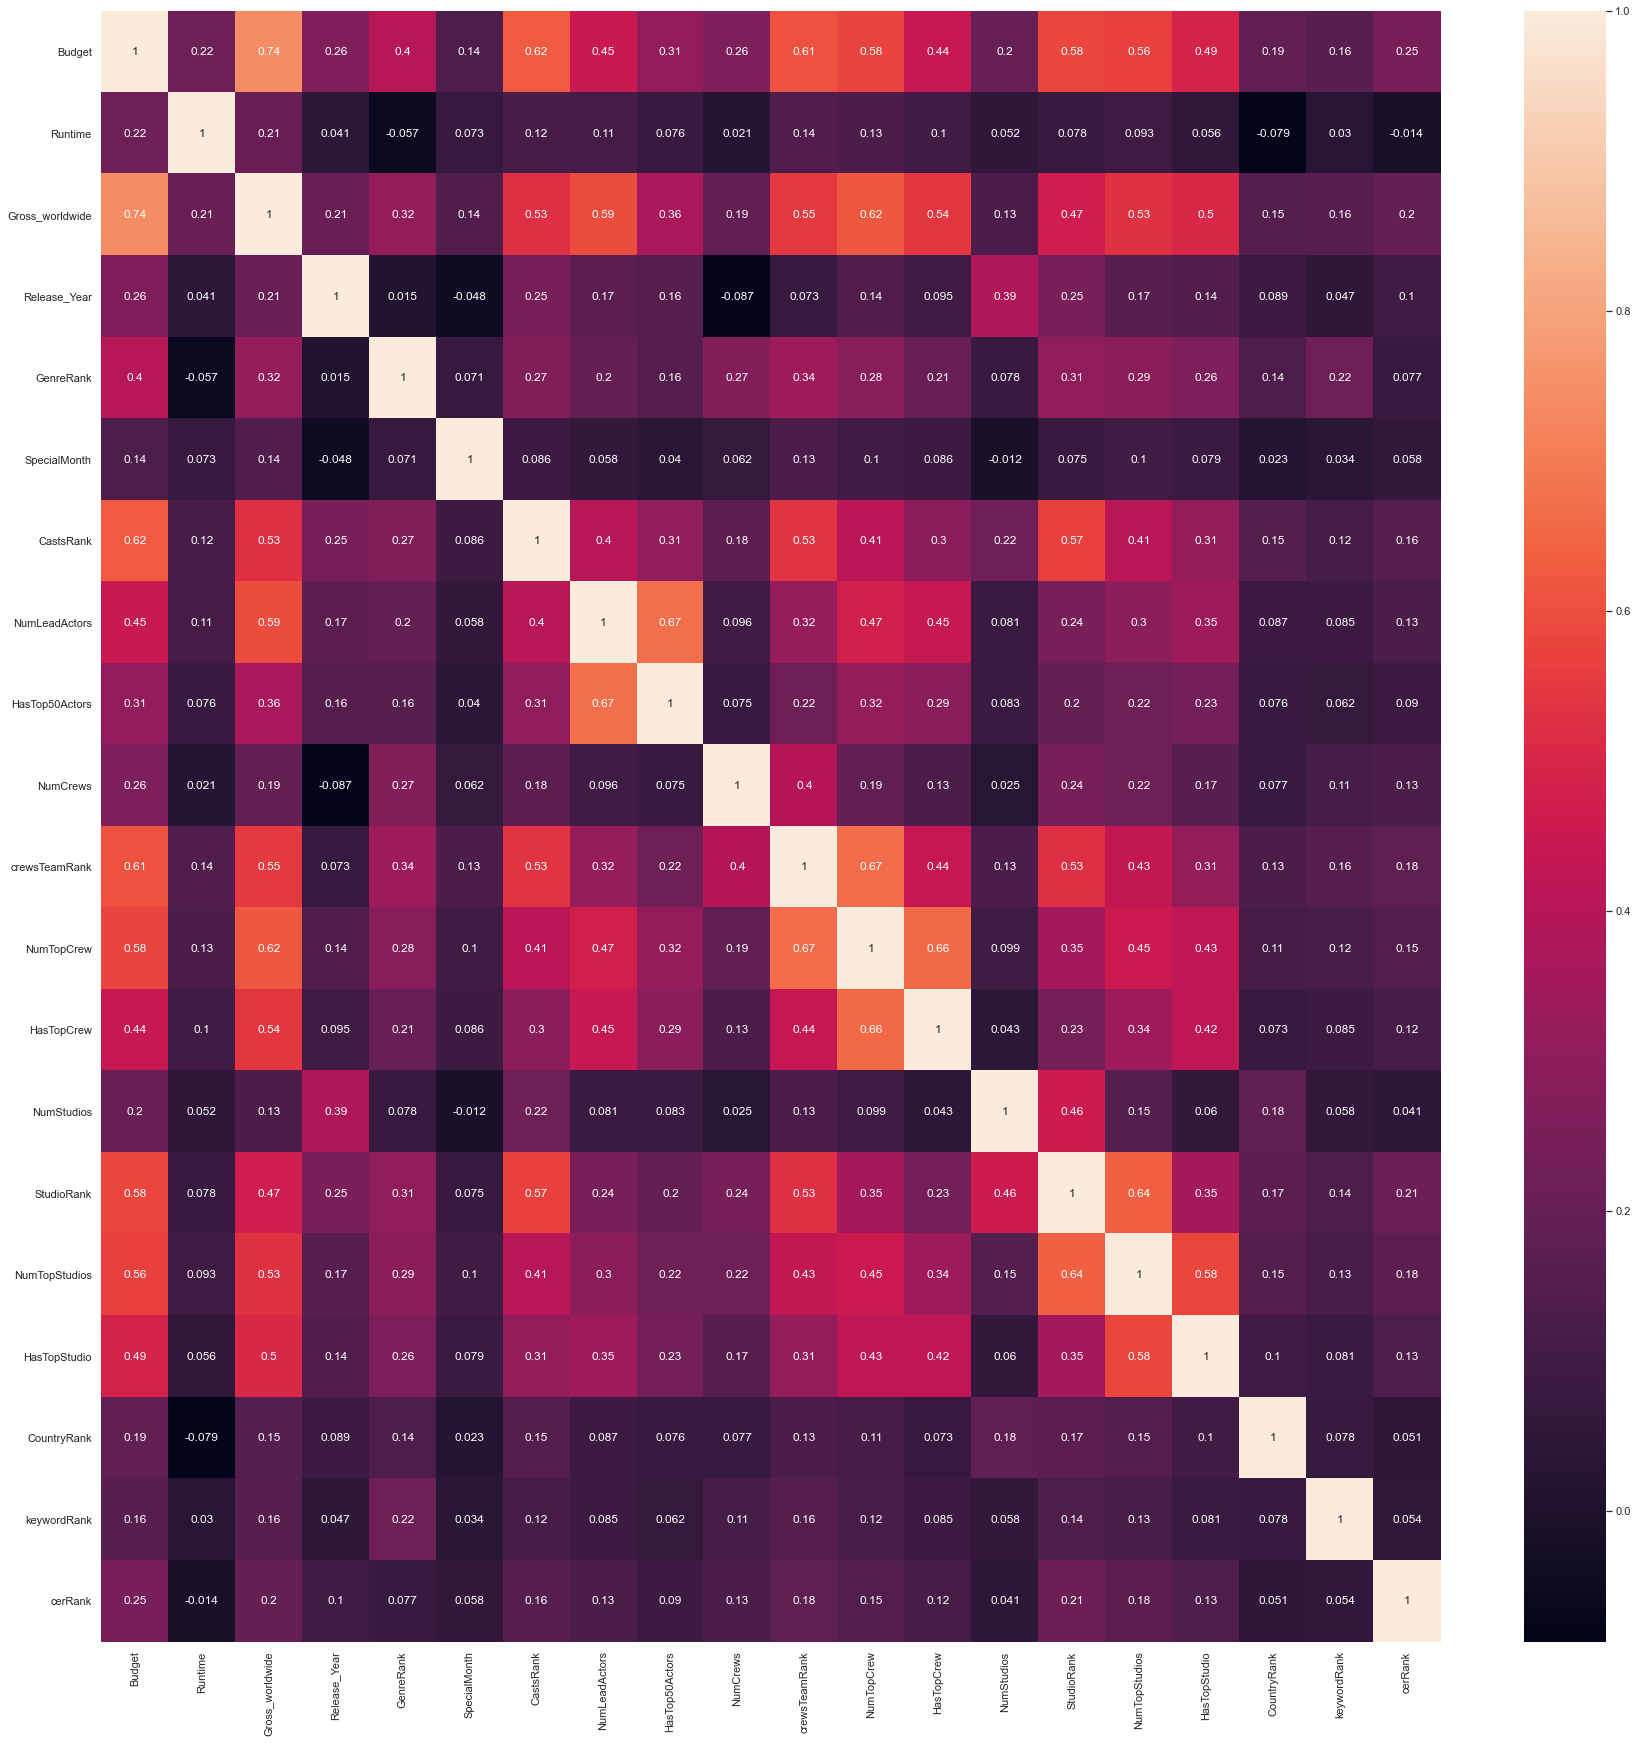

In [56]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),annot=True)
plt.show()

Top correlation with **Gross_worldwide**

In [47]:
data.corr()['Gross_worldwide'].sort_values(ascending=False)

Gross_worldwide    1.000000
Budget             0.741255
NumTopCrew         0.620654
NumLeadActors      0.593344
crewsTeamRank      0.550514
HasTopCrew         0.543905
NumTopStudios      0.529891
CastsRank          0.525807
HasTopStudio       0.503802
StudioRank         0.471237
HasTop50Actors     0.363827
GenreRank          0.317408
Runtime            0.209764
Release_Year       0.209071
cerRank            0.199208
NumCrews           0.189997
keywordRank        0.161874
CountryRank        0.154517
SpecialMonth       0.141635
NumStudios         0.132687
Name: Gross_worldwide, dtype: float64

In [48]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


In [49]:
data.columns

Index(['Budget', 'Runtime', 'Gross_worldwide', 'Release_Year', 'GenreRank',
       'SpecialMonth', 'CastsRank', 'NumLeadActors', 'HasTop50Actors',
       'NumCrews', 'crewsTeamRank', 'NumTopCrew', 'HasTopCrew', 'NumStudios',
       'StudioRank', 'NumTopStudios', 'HasTopStudio', 'CountryRank',
       'keywordRank', 'cerRank'],
      dtype='object')

## Linear Regression

- With out feature engineering

In [50]:
testScore=0
trainScore=0
mae_val=0
rmae=0
loop=10
for i in range(loop):
    lin=linear_model.LinearRegression()
    train, test = train_test_split(data,test_size=0.3)
    target=['Gross_worldwide']
    feature=['Budget','Runtime','Release_Year']
    x_train = train[feature]
    y_train = train[target]
    x_test = test[feature]
    y_test = test[target]
    lin.fit(x_train,y_train)
    y_predicted= lin.predict(x_test)
    testScore+=lin.score(x_test,y_test)
    trainScore+=lin.score(x_train,y_train)
    mae_val+=mean_absolute_error(y_test,y_predicted)
    rmae+=np.sqrt(mean_squared_error(y_test,y_predicted))
else:
    testScore/=loop
    trainScore/=loop
    mae_val/=loop
    rmae/=loop
print("Average train score: %.2f" %trainScore)
print("Average test score: %.2f" %testScore) 
print("MAE: ",mae_val)
print("RMAE: ",rmae)

Average train score: 0.55
Average test score: 0.55
MAE:  51550364.86196722
RMAE:  105475494.15679613


Mean MAE of test set with 1000 loops is 68M$ ~ 1554 Tỷ VND

- With feature engineering

In [53]:
testScore=0
trainScore=0
mae_val=0
rmae=0
loop=100
for i in range(loop):
    lin=linear_model.LinearRegression()
    train, test = train_test_split(data,test_size=0.3)
    target=['Gross_worldwide']
    x_train = train.drop('Gross_worldwide',axis=1)
    y_train = train[target]
    x_test = test.drop('Gross_worldwide',axis=1)
    y_test = test[target]
    lin.fit(x_train,y_train)
    y_predicted= lin.predict(x_test)
    testScore+=lin.score(x_test,y_test)
    trainScore+=lin.score(x_train,y_train)
    mae_val+=mean_absolute_error(y_test,y_predicted)
    rmae+=np.sqrt(mean_squared_error(y_test,y_predicted))
else:
    testScore/=loop
    mae_val/=loop
    rmae/=loop
    trainScore/=loop
print("Average train score: %.2f" %trainScore) 
print("Average test score: %.2f" %testScore) 
print("MAE: ",mae_val)
print("RMAE: ",rmae)

Average train score: 0.69
Average test score: 0.69
MAE:  45744856.80172634
RMAE:  87813955.25201625


Mean MAE of test set with 1000 loops is 60M$ ~ 1371 Tỷ VND

## Random Forest

- With feature engineering

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
from sklearn.ensemble import RandomForestRegressor

lin=RandomForestRegressor(n_estimators=100)
train, test = train_test_split(data,test_size=0.3)
target=['Gross_worldwide']
x_train = train.drop('Gross_worldwide',axis=1)
y_train = train[target]
x_test = test.drop('Gross_worldwide',axis=1)
y_test = test[target]
lin.fit(x_train,y_train)
y_predicted= lin.predict(x_test)
testScore=lin.score(x_test,y_test)
trainScore=lin.score(x_train,y_train)
mae_val=mean_absolute_error(y_test,y_predicted)
mae_val_train=mean_absolute_error(y_train,lin.predict(x_train))
rmae=np.sqrt(mean_squared_error(y_test,y_predicted))
print("Average train score: %.2f" %trainScore) 
print("Average test score: %.2f" %testScore) 
print("MAE test: ",mae_val)
print("RMAE: ",rmae)
print("MAE train: ",mae_val_train)


Average train score: 0.96
Average test score: 0.70
MAE test:  40883763.58294364
RMAE:  82734596.12023054
MAE train:  14677327.127386548


Mean MAE of test 53M$ ~ 1200 Tỷ Vietnam Dong